In [2]:
import pandas as pd

data = pd.read_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/after_extration_data.xlsx")

In [3]:
data

,Year,BirthRate,FemaleLaborParticipationRate,AvgHoursWorked,FirstBirthAge,MarriageRate,EmploymentRate,UnemploymentRate,HousingPrice,InterestRate,...,GDI,GDP,GNI,EduExpenditureOfGDP,WeeksPaidLeaveForMothers,TotalLaborParticipationRate,InflationRate,WorkLeisureBalanceIndex,LaborMarketStability,HousingAffordabilityIndex
0,1990,11.8,55.172,1652.679,27.2,5.9,53.930,3.958333,58.583861,8.964167,...,0.940,19473.072125,19561.545708,4.957250,60.0,67.429,3.261872,24.509914,13.624422,23098.466047
1,1991,12.2,55.979,1652.679,27.2,5.7,53.930,3.958333,58.583861,9.463333,...,0.942,20617.579156,20602.091660,5.103220,112.0,67.959,3.337426,24.318766,13.624422,22035.150252
2,1992,12.2,57.604,1652.679,27.3,5.8,54.558,3.958333,58.583861,9.460000,...,0.944,21293.268400,21345.923456,5.296980,112.0,68.839,4.020847,24.007888,13.783075,21572.029041
3,1993,12.0,58.208,1652.679,27.3,5.7,54.281,3.958333,58.583861,7.023334,...,0.945,21732.871184,21793.075303,5.252000,112.0,68.986,3.631786,23.956730,13.713096,21310.688329
4,1994,11.6,61.895,1652.679,27.5,5.5,56.969,4.241667,58.583861,5.117500,...,0.949,22642.841565,22677.856984,5.340175,112.0,71.342,2.953407,23.165583,13.430804,20533.130991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2017,8.4,71.674,1727.140,31.2,3.3,53.712,9.225000,117.015000,-0.329050,...,0.987,33044.700150,32269.025353,5.015610,30.1,74.690,1.368614,23.124113,5.822439,36615.542110
476,2018,8.5,72.376,1737.704,31.4,3.3,54.978,7.166667,129.032500,-0.322092,...,0.991,34928.618990,34075.601394,4.675160,30.1,75.145,0.993716,23.124679,7.671348,38177.963261
477,2019,8.4,72.901,1743.930,31.4,3.3,55.422,6.675000,141.882500,-0.356333,...,0.988,37299.182306,36330.275280,4.630020,30.1,75.523,0.338178,23.091376,8.302921,39387.314220
478,2020,8.2,71.790,1611.193,31.6,3.3,54.056,7.116667,154.327500,-0.425150,...,0.992,34955.611560,34411.605571,4.876560,30.1,74.227,-0.012438,21.706293,7.595691,45848.642022


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          480 non-null    int64  
 1   BirthRate                     480 non-null    float64
 2   FemaleLaborParticipationRate  480 non-null    float64
 3   AvgHoursWorked                480 non-null    float64
 4   FirstBirthAge                 480 non-null    float64
 5   MarriageRate                  480 non-null    float64
 6   EmploymentRate                480 non-null    float64
 7   UnemploymentRate              480 non-null    float64
 8   HousingPrice                  480 non-null    float64
 9   InterestRate                  480 non-null    float64
 10  PartTimeRate                  480 non-null    float64
 11  FamilyExpenditure             480 non-null    float64
 12  UnemploymentExpenditure       480 non-null    float64
 13  GDI  

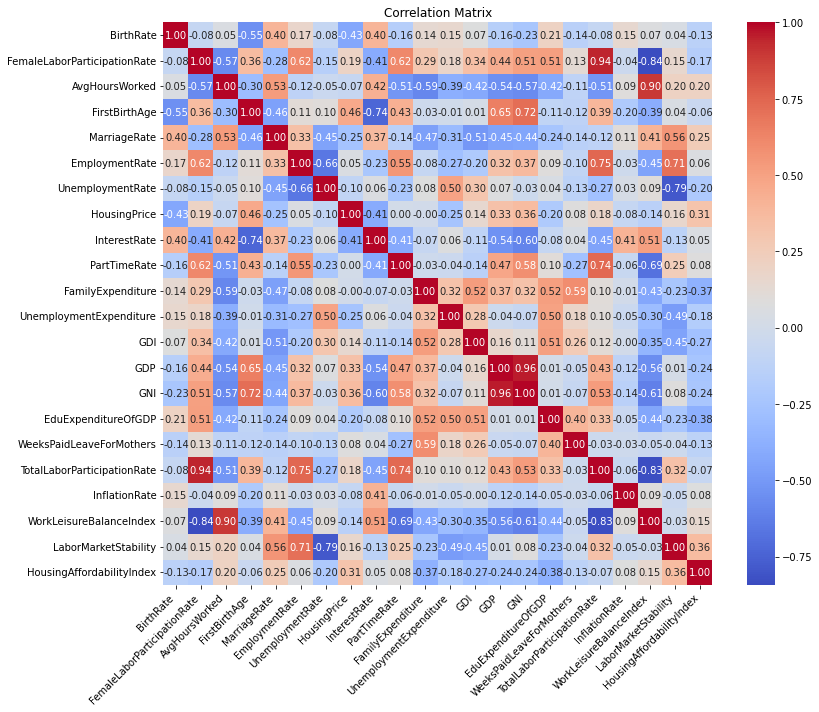

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_ = data.drop(columns='Year')
corr_matrix = data_.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

X = data.drop(['Year', 'BirthRate'], axis=1)
y = data['BirthRate']

model = RandomForestRegressor(random_state=42)

rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')

rfecv.fit(X, y)

feature_rankings_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfecv.ranking_
})

feature_rankings_df = feature_rankings_df.sort_values(by='Ranking')

feature_rankings_df

,Feature,Ranking
0,FemaleLaborParticipationRate,1
15,WeeksPaidLeaveForMothers,1
14,EduExpenditureOfGDP,1
13,GNI,1
11,GDI,1
9,FamilyExpenditure,1
10,UnemploymentExpenditure,1
4,EmploymentRate,1
3,MarriageRate,1
2,FirstBirthAge,1


## RandomForestRegressor Feature 제거

- WorkLeisureBalanceIndex
- UnemploymentRate
- InterestRate

In [17]:
from xgboost import XGBRegressor

X = data.drop(['Year', 'BirthRate'], axis=1)
y = data['BirthRate']

model = XGBRegressor(random_state=42)

rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')

rfecv.fit(X, y)

feature_rankings_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfecv.ranking_
})

feature_rankings_df = feature_rankings_df.sort_values(by='Ranking')

feature_rankings_df

,Feature,Ranking
10,UnemploymentExpenditure,1
2,FirstBirthAge,1
3,MarriageRate,1
4,EmploymentRate,1
15,WeeksPaidLeaveForMothers,1
6,HousingPrice,1
11,GDI,1
12,GDP,2
16,TotalLaborParticipationRate,3
14,EduExpenditureOfGDP,4


## XGBoostRegressor Feature 제거

- WorkLeisureBalanceIndex
- GNI
- UnemploymentRate
- InterestRate

## 다양한 데이터셋 생성

In [18]:
data_rf = data.drop(columns=['WorkLeisureBalanceIndex', 'UnemploymentRate','InterestRate'],axis=1)
data_xgb = data.drop(columns=['WorkLeisureBalanceIndex', 'UnemploymentRate','InterestRate','GNI'],axis=1)

In [ ]:
# Save the DataFrame to an Excel file
data_rf.to_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/data_rf.xlsx", index=False)
data_rf.to_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/data_xgb.xlsx", index=False)